In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
%ls

gdrive/  sample_data/


In [3]:
%cd /content/gdrive/MyDrive/Dataset

/content/gdrive/MyDrive/Dataset


In [9]:
%pwd

'/content/gdrive/MyDrive/Dataset'

In [5]:
import gdal, osr
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import seaborn as sns
import datetime
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
plt.style.use('ggplot')
import chardet
from osgeo import gdal

In [26]:
df = pd.read_excel("/content/gdrive/MyDrive/Dataset/Nov2018Data.csv")


#with open('/content/gdrive/MyDrive/Dataset/Nov2018.csv', 'rb') as f:
 #   result = chardet.detect(f.read())  # or readline if the file is large
#print(result)
#pd.read_csv('/content/gdrive/MyDrive/Dataset/Nov2018Data.csv', encoding= result[encoding])

In [27]:
df.head()

,Date,NDVI,Precipitation,LST,SoilMoisture,BurnedArea
0,2018-11-06,NDVI/MOD13Q1.A2018305.h08v05.006.2018321225857...,Precipitation/3B-MO.MS.MRG.3IMERG.20181101-S00...,LST/MYD11A1.A2018310.h08v05.006.2018311191511.hdf,soilMoisture/SMAP_L3_SM_P_20181106_R17000_001.h5,BurnedArea/VNP14A1.A2018310.h08v05.001.2018311...
1,2018-11-07,NDVI/MOD13Q1.A2018305.h08v05.006.2018321225857...,Precipitation/3B-MO.MS.MRG.3IMERG.20181101-S00...,LST/MYD11A1.A2018311.h08v05.006.2018312183238.hdf,soilMoisture/SMAP_L3_SM_P_20181107_R17000_001.h5,BurnedArea/VNP14A1.A2018311.h08v05.001.2018312...
2,2018-11-08,NDVI/MOD13Q1.A2018305.h08v05.006.2018321225857...,Precipitation/3B-MO.MS.MRG.3IMERG.20181101-S00...,LST/MYD11A1.A2018312.h08v05.006.2018313203022.hdf,soilMoisture/SMAP_L3_SM_P_20181108_R17000_001.h5,BurnedArea/VNP14A1.A2018312.h08v05.001.2018313...
3,2018-11-09,NDVI/MOD13Q1.A2018305.h08v05.006.2018321225857...,Precipitation/3B-MO.MS.MRG.3IMERG.20181101-S00...,LST/MYD11A1.A2018313.h08v05.006.2018337165407.hdf,soilMoisture/SMAP_L3_SM_P_20181106_R17000_001.h5,BurnedArea/VNP14A1.A2018313.h08v05.001.2018314...
4,2018-11-10,NDVI/MOD13Q1.A2018305.h08v05.006.2018321225857...,Precipitation/3B-MO.MS.MRG.3IMERG.20181101-S00...,LST/MYD11A1.A2018314.h08v05.006.2018315182825.hdf,soilMoisture/SMAP_L3_SM_P_20181110_R17000_001.h5,BurnedArea/VNP14A1.A2018314.h08v05.001.2018315...


In [7]:
#for columns in df.columns:
 # print(columns)
 
df['Date'] = pd.to_datetime(df['Date']).apply(lambda x: x.date())
for index, row in df.iterrows():
    #print(row.LST)
    rowData = row.NDVI
    #print(rowData)
    hdf_ds = gdal.Open(rowData, gdal.GA_ReadOnly)  
    data = hdf_ds.GetSubDatasets()[0][0]
    print(data)
    NDVI = gdal.Open(data)
    row.NDVI = (NDVI.ReadAsArray())
    
    #passer = np.logical_and( NDVI > NDVI.min(), NDVI <= NDVI.max() )

HDF4_EOS:EOS_GRID:"NDVI/MOD13Q1.A2018305.h08v05.006.2018321225857.hdf":MODIS_Grid_16DAY_250m_500m_VI:250m 16 days NDVI
HDF4_EOS:EOS_GRID:"NDVI/MOD13Q1.A2018305.h08v05.006.2018321225857.hdf":MODIS_Grid_16DAY_250m_500m_VI:250m 16 days NDVI
HDF4_EOS:EOS_GRID:"NDVI/MOD13Q1.A2018305.h08v05.006.2018321225857.hdf":MODIS_Grid_16DAY_250m_500m_VI:250m 16 days NDVI
HDF4_EOS:EOS_GRID:"NDVI/MOD13Q1.A2018305.h08v05.006.2018321225857.hdf":MODIS_Grid_16DAY_250m_500m_VI:250m 16 days NDVI
HDF4_EOS:EOS_GRID:"NDVI/MOD13Q1.A2018305.h08v05.006.2018321225857.hdf":MODIS_Grid_16DAY_250m_500m_VI:250m 16 days NDVI
HDF4_EOS:EOS_GRID:"NDVI/MOD13Q1.A2018305.h08v05.006.2018321225857.hdf":MODIS_Grid_16DAY_250m_500m_VI:250m 16 days NDVI
HDF4_EOS:EOS_GRID:"NDVI/MOD13Q1.A2018305.h08v05.006.2018321225857.hdf":MODIS_Grid_16DAY_250m_500m_VI:250m 16 days NDVI
HDF4_EOS:EOS_GRID:"NDVI/MOD13Q1.A2018305.h08v05.006.2018321225857.hdf":MODIS_Grid_16DAY_250m_500m_VI:250m 16 days NDVI
HDF4_EOS:EOS_GRID:"NDVI/MOD13Q1.A2018305.h08v05.

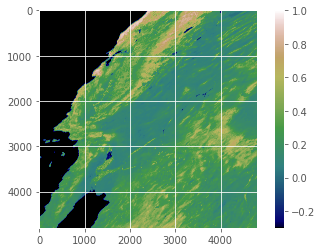

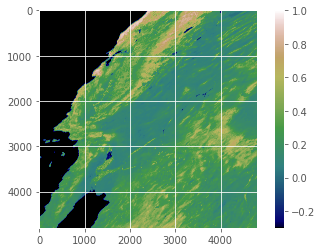

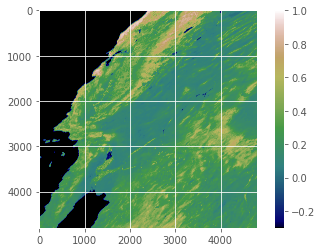

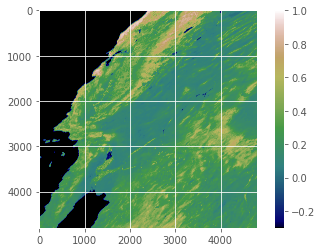

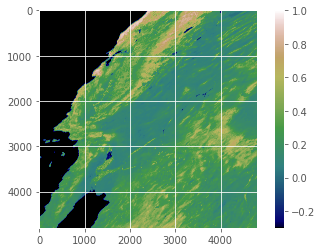

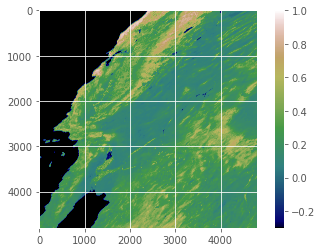

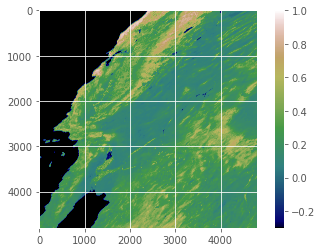

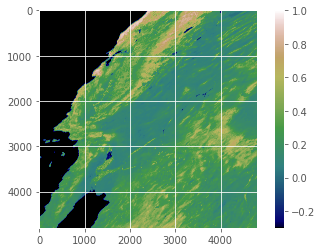

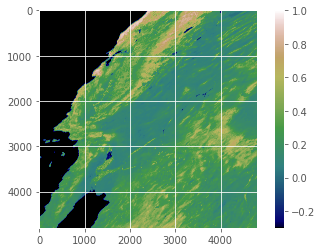

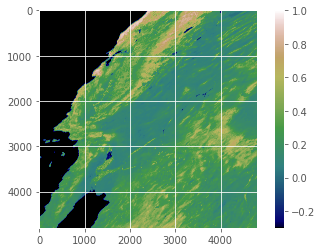

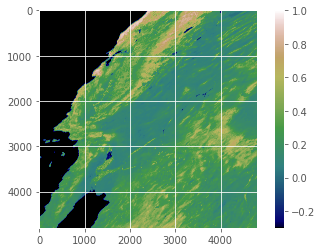

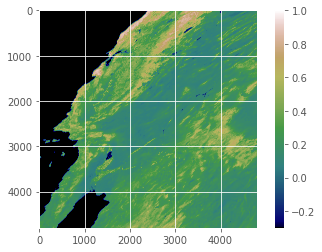

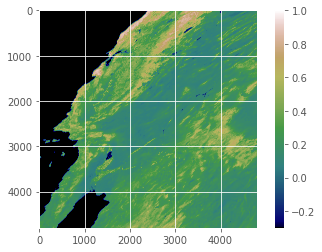

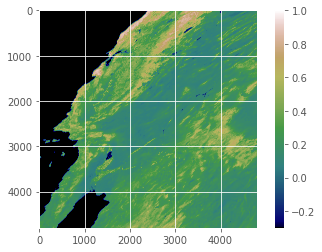

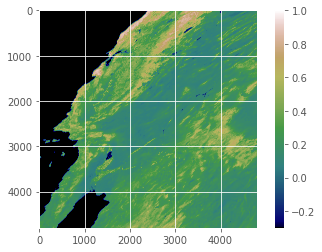

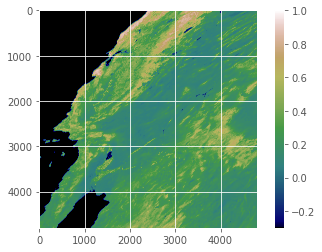

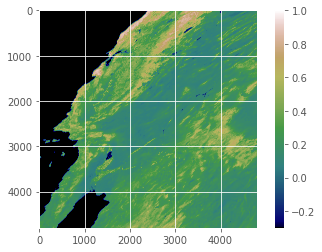

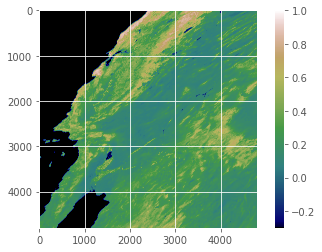

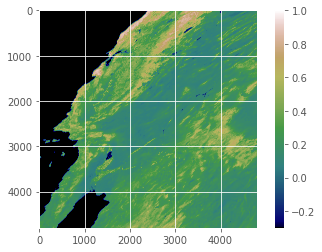

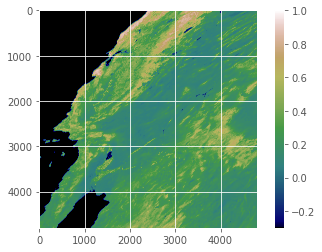

In [43]:
#total_rows = df['Date'].count()
#fig, axs = plt.subplots(1, total_rows, figsize=(20,10))
#fig, axes = plt.subplots(total_rows, 2)
for index, row in df.iterrows():
  plt.figure()
  plt.imshow(row.NDVI, cmap=plt.cm.gist_earth)
  plt.colorbar()

In [48]:
print(rowData)

NDVI/MOD13Q1.A2018321.h08v05.006.2018338084403.hdf


In [59]:
for index, row in df.iterrows():
    rowData = row.Precipitation
    #print(rowData)
    hdf_ds = gdal.Open(rowData, gdal.GA_ReadOnly)  
    data = hdf_ds.GetSubDatasets()[3][0]
    #print(data)
    Precipitation = gdal.Open(data)
    row.Precipitation = (Precipitation.ReadAsArray())

In [67]:
print(hdf_ds.GetSubDatasets()[3][0])

HDF5:"Precipitation/3B-MO.MS.MRG.3IMERG.20181101-S000000-E235959.11.V06B.HDF5"://Grid/precipitation


In [75]:
for index, row in df.iterrows():
  row.Precipitation = row.Precipitation / row.Precipitation.max()

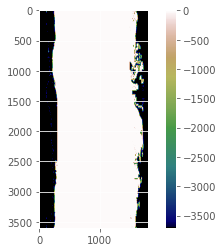

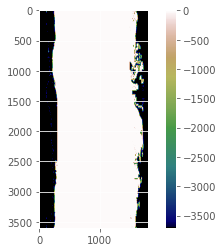

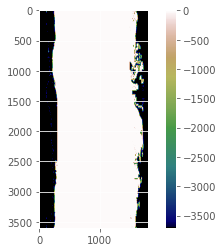

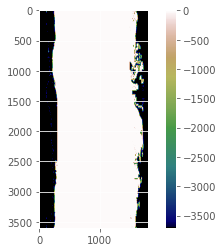

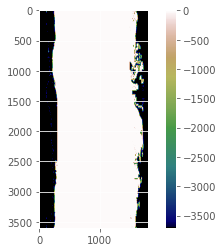

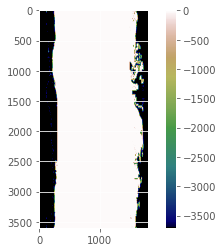

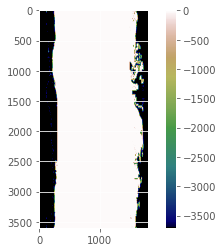

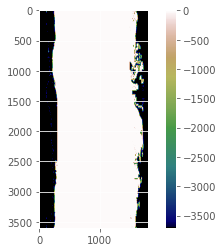

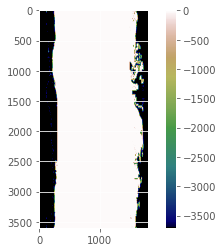

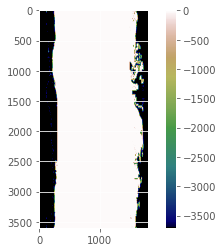

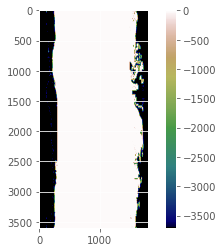

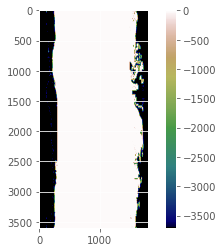

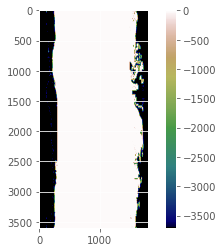

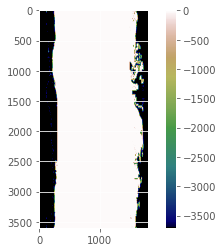

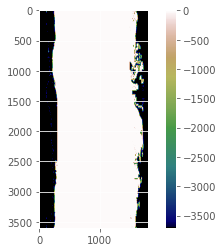

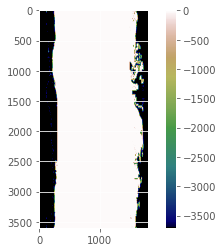

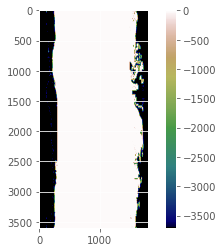

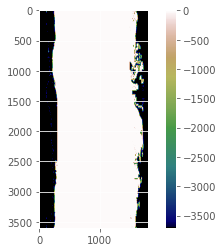

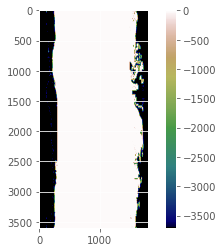

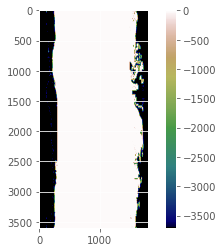

In [76]:
for index, row in df.iterrows():
  plt.figure()
  plt.imshow(row.Precipitation, vmin=row.Precipitation.min(), cmap=plt.cm.gist_earth)
  plt.colorbar()

In [28]:
df.head(16)

,Date,NDVI,Precipitation,LST,SoilMoisture,BurnedArea
0,2018-11-06,NDVI/MOD13Q1.A2018305.h08v05.006.2018321225857...,Precipitation/3B-MO.MS.MRG.3IMERG.20181101-S00...,LST/MYD11A1.A2018310.h08v05.006.2018311191511.hdf,soilMoisture/SMAP_L3_SM_P_20181106_R17000_001.h5,BurnedArea/VNP14A1.A2018310.h08v05.001.2018311...
1,2018-11-07,NDVI/MOD13Q1.A2018305.h08v05.006.2018321225857...,Precipitation/3B-MO.MS.MRG.3IMERG.20181101-S00...,LST/MYD11A1.A2018311.h08v05.006.2018312183238.hdf,soilMoisture/SMAP_L3_SM_P_20181107_R17000_001.h5,BurnedArea/VNP14A1.A2018311.h08v05.001.2018312...
2,2018-11-08,NDVI/MOD13Q1.A2018305.h08v05.006.2018321225857...,Precipitation/3B-MO.MS.MRG.3IMERG.20181101-S00...,LST/MYD11A1.A2018312.h08v05.006.2018313203022.hdf,soilMoisture/SMAP_L3_SM_P_20181108_R17000_001.h5,BurnedArea/VNP14A1.A2018312.h08v05.001.2018313...
3,2018-11-09,NDVI/MOD13Q1.A2018305.h08v05.006.2018321225857...,Precipitation/3B-MO.MS.MRG.3IMERG.20181101-S00...,LST/MYD11A1.A2018313.h08v05.006.2018337165407.hdf,soilMoisture/SMAP_L3_SM_P_20181106_R17000_001.h5,BurnedArea/VNP14A1.A2018313.h08v05.001.2018314...
4,2018-11-10,NDVI/MOD13Q1.A2018305.h08v05.006.2018321225857...,Precipitation/3B-MO.MS.MRG.3IMERG.20181101-S00...,LST/MYD11A1.A2018314.h08v05.006.2018315182825.hdf,soilMoisture/SMAP_L3_SM_P_20181110_R17000_001.h5,BurnedArea/VNP14A1.A2018314.h08v05.001.2018315...
5,2018-11-11,NDVI/MOD13Q1.A2018305.h08v05.006.2018321225857...,Precipitation/3B-MO.MS.MRG.3IMERG.20181101-S00...,LST/MYD11A1.A2018315.h08v05.006.2018316190856.hdf,soilMoisture/SMAP_L3_SM_P_20181111_R17000_001.h5,BurnedArea/VNP14A1.A2018315.h08v05.001.2018316...
6,2018-11-12,NDVI/MOD13Q1.A2018305.h08v05.006.2018321225857...,Precipitation/3B-MO.MS.MRG.3IMERG.20181101-S00...,LST/MYD11A1.A2018316.h08v05.006.2018317183149.hdf,soilMoisture/SMAP_L3_SM_P_20181112_R17000_001.h5,BurnedArea/VNP14A1.A2018316.h08v05.001.2018317...
7,2018-11-13,NDVI/MOD13Q1.A2018305.h08v05.006.2018321225857...,Precipitation/3B-MO.MS.MRG.3IMERG.20181101-S00...,LST/MYD11A1.A2018317.h08v05.006.2018318183807.hdf,soilMoisture/SMAP_L3_SM_P_20181113_R17000_001.h5,BurnedArea/VNP14A1.A2018317.h08v05.001.2018318...
8,2018-11-14,NDVI/MOD13Q1.A2018305.h08v05.006.2018321225857...,Precipitation/3B-MO.MS.MRG.3IMERG.20181101-S00...,LST/MYD11A1.A2018318.h08v05.006.2018319183125.hdf,soilMoisture/SMAP_L3_SM_P_20181114_R17000_001.h5,BurnedArea/VNP14A1.A2018318.h08v05.001.2018319...
9,2018-11-15,NDVI/MOD13Q1.A2018305.h08v05.006.2018321225857...,Precipitation/3B-MO.MS.MRG.3IMERG.20181101-S00...,LST/MYD11A1.A2018319.h08v05.006.2018337195932.hdf,soilMoisture/SMAP_L3_SM_P_20181115_R17000_001.h5,BurnedArea/VNP14A1.A2018319.h08v05.001.2018320...


In [38]:
for index, row in df.iterrows():
    rowData = '/content/gdrive/MyDrive/Dataset/' + row.SoilMoisture
    print(rowData)
    hdf_ds = gdal.Open(rowData, gdal.GA_ReadOnly)  
    #data = hdf_ds.GetSubDatasets()
    print(hdf_ds)
    #Precipitation = gdal.Open(data)
    #row.Precipitation = (Precipitation.ReadAsArray())

/content/gdrive/MyDrive/Dataset/soilMoisture/SMAP_L3_SM_P_20181106_R17000_001.h5
None
/content/gdrive/MyDrive/Dataset/soilMoisture/SMAP_L3_SM_P_20181107_R17000_001.h5
None
/content/gdrive/MyDrive/Dataset/soilMoisture/SMAP_L3_SM_P_20181108_R17000_001.h5
None
/content/gdrive/MyDrive/Dataset/soilMoisture/SMAP_L3_SM_P_20181106_R17000_001.h5
None
/content/gdrive/MyDrive/Dataset/soilMoisture/SMAP_L3_SM_P_20181110_R17000_001.h5
None
/content/gdrive/MyDrive/Dataset/soilMoisture/SMAP_L3_SM_P_20181111_R17000_001.h5
None
/content/gdrive/MyDrive/Dataset/soilMoisture/SMAP_L3_SM_P_20181112_R17000_001.h5
None
/content/gdrive/MyDrive/Dataset/soilMoisture/SMAP_L3_SM_P_20181113_R17000_001.h5
None
/content/gdrive/MyDrive/Dataset/soilMoisture/SMAP_L3_SM_P_20181114_R17000_001.h5
None
/content/gdrive/MyDrive/Dataset/soilMoisture/SMAP_L3_SM_P_20181115_R17000_001.h5
None
/content/gdrive/MyDrive/Dataset/soilMoisture/SMAP_L3_SM_P_20181116_R17000_001.h5
None
/content/gdrive/MyDrive/Dataset/soilMoisture/SMAP_L3_S

In [ ]:
print(hdf_ds.GetSubDatasets()[3][0])

In [44]:

#print(row.NDVI[0])

In [36]:
for index, row in df.iterrows():
  row.NDVI = row.NDVI / row.NDVI.max()
#(NDVI[passer].min(), NDVI[passer].max(), NDVI[passer].mean(), NDVI[passer].std())

2018-11-06
9990
2018-11-07
9990
2018-11-08
9990
2018-11-09
9990
2018-11-10
9990
2018-11-11
9990
2018-11-12
9990
2018-11-13
9990
2018-11-14
9990
2018-11-15
9990
2018-11-16
9990
2018-11-17
9991
2018-11-18
9991
2018-11-19
9991
2018-11-20
9991
2018-11-21
9991
2018-11-22
9991
2018-11-23
9991
2018-11-24
9991
2018-11-25
9991


In [ ]:
data = np.ma.masked_where(np.isnan(data), data)

AttributeError: ignored

In [18]:
print(hdf_ds)

None


In [ ]:
NDVI_Data = gdal.Open('HDF4_EOS:EOS_GRID:"/content/gdrive/MyDrive/data/MOD11A1.A2018311.h08v05.006.2018313174930.hdf":MODIS_Grid_Daily_1km_LST:LST_Day_1km')

In [ ]:
NDVI = NDVI_Data.ReadAsArray()

In [ ]:
print(NDVI.min(), NDVI.max(), NDVI.mean(), NDVI.std())

0 15851 11659.250108333334 6212.3488938516875


In [ ]:
passer = np.logical_and( NDVI > 0, NDVI <= 15851 )
(NDVI[passer].min(), NDVI[passer].max(), NDVI[passer].mean(), NDVI[passer].std())

(0.8810437452033768, 1.0, 0.9660161062881265, 0.017282287156160148)

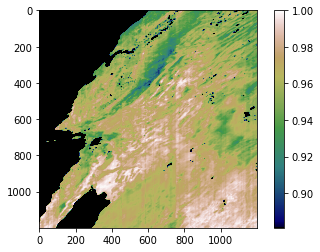

In [ ]:
import matplotlib.pyplot as plt
plt.imshow ( NDVI, vmin=0.8810437452033768, cmap=plt.cm.gist_earth)
plt.colorbar()

In [ ]:
coordinates = NDVI_Data.GetGeoTransform()
print(coordinates)

(-11119505.197665, 926.6254331383342, 0.0, 4447802.079066, 0.0, -926.6254331383334)


In [ ]:
from sklearn.preprocessing import normalize
NDVI = normalize(NDVI, axis=0, norm='max')

In [ ]:
print(NDVI)

[[0.         0.         0.         ... 0.928      0.93850059 0.95227865]
 [0.         0.         0.         ... 0.94452033 0.96179878 0.96223958]
 [0.         0.         0.         ... 0.96091057 0.96127815 0.95989583]
 ...
 [0.99729872 0.9947951  0.99347697 ... 0.99460163 0.99420799 0.99257812]
 [0.99426802 0.99354329 0.99354286 ... 0.99362602 0.99271118 0.990625  ]
 [0.99387271 0.99380683 0.99374053 ... 0.99349593 0.9904985  0.98951823]]


In [ ]:
LST_data = gdal.Open('HDF4_EOS:EOS_GRID:"/content/gdrive/MyDrive/data/MOD11A1.A2018311.h08v05.006.2018313174930.hdf":MODIS_Grid_Daily_1km_LST:Emis_31')

In [ ]:
LST = LST_data.ReadAsArray()

In [ ]:
print(LST.min(), LST.max(), LST.mean(), LST.std())

0 251 190.15330972222222 99.82112195219875


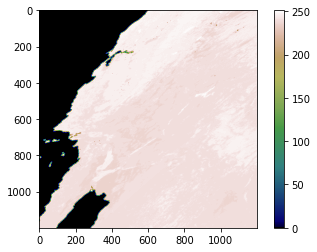

In [ ]:
plt.imshow ( LST, vmin=0 , cmap=plt.cm.gist_earth)
plt.colorbar()

In [ ]:
print(LST)

[[  0   0   0 ... 246 246 244]
 [  0   0   0 ... 246 242 243]
 [  0   0   0 ... 243 244 245]
 ...
 [241 241 241 ... 241 241 241]
 [241 241 241 ... 241 241 241]
 [241 241 241 ... 241 241 241]]


In [ ]:
LST = normalize(LST, axis=0, norm='max')